<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/Gaussian_mixture_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Gaussian mixture model:
<h2> Part 1: Lab 

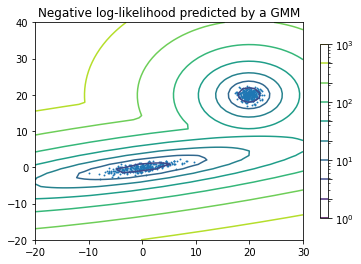

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
n_samples = 300
# generate random sample, two components
np.random.seed(0)
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [5]:
X.shape

(50, 50)

In [6]:
import math
import numpy as np

# a=math.pi
# I=600
# J=2 #nb de clusters
# phi=1/J #initialisation
# N = 2
# nu = np.zeros((2,2))
# print(nu.shape)
# for n in range(N):
#   for j in range(J):
#     nu[n][j] = np.random.uniform(-10,30)
# print(nu)

# #Calcul de sigma
# sigma0 = np.identity(2)
# sigma1 = np.identity(2)
# s = 0
# det_sigma0=np.linalg.det(sigma0)
# det_sigma1=np.linalg.det(sigma1)

# inv_sigma0 = np.linalg.reverse()
# inv_sigma0 = sigma0.reverse()
# inv_sigma1 = sigma1.reverse()


# somme1 = ((1/(((2*a)**(n/2)))*math.sqrt(sigma[j]))*exp(-(1/2)*np.transpose(X_train[i]-nu[j])*inv_sigma*(X_train[i]-nu[j]))*Phi[j])

# somme2 = ((1/(((2*a)**(n/2)))*math.sqrt(sigma[j]))*exp(-(1/2)*np.transpose(X_train[i]-nu[l])*inv_sigma*(X_train[i]-nu[l]))*Phi[j])



# w0 = ((1/(((2*a)**(n/2)))*math.sqrt(sigma0))*exp(-(1/2)(x-nu[0]))*Phi[j])/somme1
# w1 = ((1/(((2*a)**(n/2)))*math.sqrt(sigma1))*exp(-(1/2)(x-nu[1]))*Phi[j])/somme2

<h1>Part 2: Gaussian Mixture Model from scratch:<h1> 

In [629]:
import numpy as np
import math

<h3> Training set creation :

In [630]:
n_samples = 300
# generate random sample, two components
np.random.seed(42)
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])


<h3> Visualisation:

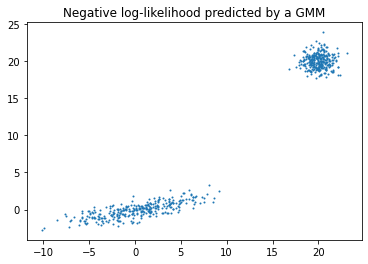

In [631]:
plt.scatter(X_train[:, 0], X_train[:, 1], 1)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

<h3>Initialisation:

In [641]:
# number of data point = nsample * 2 as we create two gaussian distribution
I=600
#number of clusters 
J=2 
# number of features
N = 2
# phi which is a value that tell how big a gaussian is ?
phi = np.zeros(J)
for j in range(J):
  phi[j] = 1/J
# centroid initialisation or expected value nu of gaussian 
nu = np.zeros((2,2))
for n in range(N):
  for j in range(J):
    nu[n][j] = np.random.uniform(-10,30)
# initialisation of standard devisation of gaussian
sigma = np.ndarray((N,N,J))
for n in range(N):
  sigma[n] = np.identity(2)

print(nu)

[[14.43923955  6.44113879]
 [23.59445211 26.00092494]]


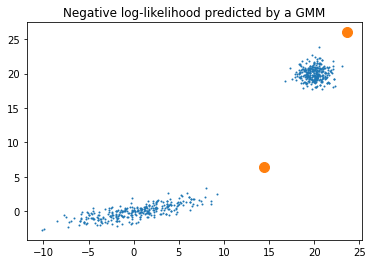

In [642]:
plt.scatter(X_train[:, 0], X_train[:, 1], 1)
plt.scatter(nu[:, 0], nu[:,1], 100)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

<h3> Expectation step:
<h4> initialize and calculate the weights

In [643]:
# weight initialisation:
w = np.ndarray((I,J))
for i in range(I):
  for j in range(J):
    w[i][j] = 0.0


In [644]:
def expectation(w,phi,nu,sigma):

  alpha = 10

  for i in range(I):
    for j in range(J):

# note: in the course, we have a sum from l=1 to k, we assume that we have to sum on J because Z can take the value j0,j1,... up to J

  # (x - u).T * sigma * x - u ) = SCALAAAAAAAAAAAAAR
    #somme inferieur:

      somme = 0
      for l in range(J):
        somme +=    1/(  ((2*np.pi)**(N/2))  *   np.sqrt(np.linalg.det(sigma[l])) ) *  np.exp(    (-1/2)   *  np.dot( np.dot((X_train[i]-nu[l]).reshape(-1,1).T, np.linalg.inv(sigma[l])) , (X_train[i]-nu[l]).reshape(-1,1)  )     ) *  phi[l]                                

      w[i][j] = ( 1/(  ((2*np.pi)**(N/2))  *   np.sqrt(np.linalg.det(sigma[j]))  ) *  np.exp(    (-1/2)   *  np.dot( np.dot((X_train[i]-nu[j]).T, np.linalg.inv(sigma[j])) , (X_train[i]-nu[j]).T  )     ) *  phi[j]   ) / somme

  return w

<h3> Maximization step: 

In [645]:
def maximization(w,phi,nu,sigma):

  for j in range(J):

    somme_weight=np.zeros(J)
################################
# phi update

    for i in range (I):
      somme_weight[j] +=   w[i][j]

    phi[j]=  (1/I)*somme_weight[j]
    #print(somme_weight)

################################
# nu update

    somme_nu=0
    for i in range(I):
      somme_nu += w[i][j] * X_train[i]
                         
    nu[j]=somme_nu/somme_weight[j]

# ################################
# sigma update
    somme_sigma = 0
    for i in range(I):
      somme_sigma +=   w[i][j] *  np.dot((X_train[i]-nu[j]).reshape(-1,1).T,(X_train[i]-nu[j]).reshape(-1,1))

    for n in range(N):
      sigma[j][n][n] = somme_sigma/somme_weight[j]
  
  return (phi,nu,sigma)

<h3> Loop until convergence:

In [646]:

for i in range(20):
  w = expectation(w,phi,nu,sigma)
  phi,nu,sigma = maximization(w,phi,nu,sigma)

In [647]:
# print(nu)
# print()
# print(sigma)

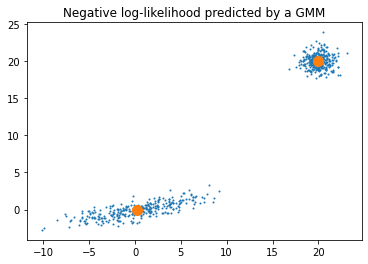

In [648]:
plt.scatter(X_train[:, 0], X_train[:, 1], 1)
plt.scatter(nu[:, 0], nu[:,1], 100)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()